<a href="https://colab.research.google.com/github/Pushkarp26/Machine-Learning-of-energy-use-of-appliances-in-alow-energy-house/blob/main/XgBoost_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error 

#**What is XGBoost?**

XGBoost stands for e**X**treme **G**radient **Boost**ing.

#**What Algorithm Does XGBoost Use?**
The XGBoost library implements the gradient boosting decision tree algorithm.

This algorithm goes by lots of different names such as gradient boosting, multiple additive regression trees, stochastic gradient boosting or gradient boosting machines.

Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. A popular example is the AdaBoost algorithm that weights data points that are hard to predict.

Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

This approach supports both regression and classification predictive modeling problems.

Importing the Predictor and Target variables that I have extracted after Data wrangling.

In [2]:
X = pd.read_csv("predictor.csv")
X.drop("Unnamed: 0",axis=1,inplace=True)
y = pd.read_csv("target.csv")
y.drop("Unnamed: 0",axis=1,inplace=True)

print("Predictor features:\n {}\n\nTarget Features:\n {}".format(X.head(),y.head()))

Predictor features:
    Kitchen_Temp  Kitchen_Humidity  Living_room_Temp  ...        rv2  Weekday    NSM
0         19.89         47.596667              19.2  ...  13.275433        0  61200
1         19.89         46.693333              19.2  ...  18.606195        0  61800
2         19.89         46.300000              19.2  ...  28.642668        0  62400
3         19.89         46.066667              19.2  ...  45.410389        0  63000
4         19.89         46.333333              19.2  ...  10.084097        0  63600

[5 rows x 28 columns]

Target Features:
    Total_Energy_Consumption
0                        90
1                        90
2                        80
3                        90
4                       100


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kitchen_Temp             19735 non-null  float64
 1   Kitchen_Humidity         19735 non-null  float64
 2   Living_room_Temp         19735 non-null  float64
 3   Living_room_Humidity     19735 non-null  float64
 4   Laundry_room Temp        19735 non-null  float64
 5   Laundry_room_Humidity    19735 non-null  float64
 6   Office_Temp              19735 non-null  float64
 7   Office_Humidity          19735 non-null  float64
 8   Bathroom_Temp            19735 non-null  float64
 9   Bathroom_Humidity        19735 non-null  float64
 10  Building_North_Temp      19735 non-null  float64
 11  Building_North_Humidity  19735 non-null  float64
 12  Ironing_room_Temp        19735 non-null  float64
 13  Ironing _room_Humidity   19735 non-null  float64
 14  Childrens_room_Temp   

In [4]:
df = pd.read_csv("Data_1.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      19735 non-null  object 
 1   Appliances                19735 non-null  int64  
 2   lights                    19735 non-null  int64  
 3   Kitchen_Temp              19735 non-null  float64
 4   Kitchen_Humidity          19735 non-null  float64
 5   Living_room_Temp          19735 non-null  float64
 6   Living_room_Humidity      19735 non-null  float64
 7   Laundry_room Temp         19735 non-null  float64
 8   Laundry_room_Humidity     19735 non-null  float64
 9   Office_Temp               19735 non-null  float64
 10  Office_Humidity           19735 non-null  float64
 11  Bathroom_Temp             19735 non-null  float64
 12  Bathroom_Humidity         19735 non-null  float64
 13  Building_North_Temp       19735 non-null  float64
 14  Buildi

Predictor features have missing features which we'll need for analysis.
Let's add them.

In [5]:
X['Weekstatus'],X['Day_of_week'] = df[['Weekstatus']],df[['Day_of_week']]
print(X.columns)
#pd.get_dummies(X['Day_of_week'])

Index(['Kitchen_Temp', 'Kitchen_Humidity', 'Living_room_Temp',
       'Living_room_Humidity', 'Laundry_room Temp', 'Laundry_room_Humidity',
       'Office_Temp', 'Office_Humidity', 'Bathroom_Temp', 'Bathroom_Humidity',
       'Building_North_Temp', 'Building_North_Humidity', 'Ironing_room_Temp',
       'Ironing _room_Humidity', 'Childrens_room_Temp',
       'Childrens_room_Humidity', 'Parents_room_Temp', 'Parents_room_Humidity',
       'Outside_Temp', 'Outside_Press', 'Outside_Humidity', 'Windspeed',
       'Visibility', 'Dewpoint_Temp', 'rv1', 'rv2', 'Weekday', 'NSM',
       'Weekstatus', 'Day_of_week'],
      dtype='object')


*Day of week* is a categorical feature and as such we have *weekday* fetaure which denotes the day number of the week eg:. 0(Monday), 1(Tuesday) and so on.
So, we'll use only that feature to avoid duplication of features.


In [6]:
X.drop('Day_of_week',axis=1,inplace=True)
X.head()

,Kitchen_Temp,Kitchen_Humidity,Living_room_Temp,Living_room_Humidity,Laundry_room Temp,Laundry_room_Humidity,Office_Temp,Office_Humidity,Bathroom_Temp,Bathroom_Humidity,Building_North_Temp,Building_North_Humidity,Ironing_room_Temp,Ironing _room_Humidity,Childrens_room_Temp,Childrens_room_Humidity,Parents_room_Temp,Parents_room_Humidity,Outside_Temp,Outside_Press,Outside_Humidity,Windspeed,Visibility,Dewpoint_Temp,rv1,rv2,Weekday,NSM,Weekstatus
0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,0,61200,1
1,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,0,61800,1
2,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,0,62400,1
3,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,0,63000,1
4,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,0,63600,1


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kitchen_Temp             19735 non-null  float64
 1   Kitchen_Humidity         19735 non-null  float64
 2   Living_room_Temp         19735 non-null  float64
 3   Living_room_Humidity     19735 non-null  float64
 4   Laundry_room Temp        19735 non-null  float64
 5   Laundry_room_Humidity    19735 non-null  float64
 6   Office_Temp              19735 non-null  float64
 7   Office_Humidity          19735 non-null  float64
 8   Bathroom_Temp            19735 non-null  float64
 9   Bathroom_Humidity        19735 non-null  float64
 10  Building_North_Temp      19735 non-null  float64
 11  Building_North_Humidity  19735 non-null  float64
 12  Ironing_room_Temp        19735 non-null  float64
 13  Ironing _room_Humidity   19735 non-null  float64
 14  Childrens_room_Temp   

Splitting the data into training and testing sets.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

print("X_train:",X_train.shape,"\t","y_train:",y_train.shape,"\n",'X_test:',
       X_test.shape,"\t","y_test:",y_test.shape)

X_train: (13814, 29) 	 y_train: (13814, 1) 
 X_test: (5921, 29) 	 y_test: (5921, 1)


**XgBoost** modelling

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,
                          learning_rate = 0.1, max_depth = 5, alpha = 10,
                          n_estimators = 10)

Training our model on train set and predicting on test set.

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
preds

array([42.200832, 86.37693 , 48.280056, ..., 52.394344, 79.758095,
       49.130344], dtype=float32)

Evaluating Root Mean Squared Error.

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 101.579622


In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse",
                    as_pandas=True, seed=123)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,137.563573,0.059344,137.729899,0.177705
1,130.894984,0.135461,131.206131,0.156163
2,125.182091,0.065036,125.707832,0.255803
3,120.032939,0.285189,120.676687,0.535644
4,115.610886,0.192870,116.548187,0.419784
...,...,...,...,...
95,70.886910,0.243665,81.864637,0.269656
96,70.796328,0.253004,81.836947,0.277490
97,70.626335,0.228606,81.758464,0.260154
98,70.476583,0.173482,81.704760,0.256095


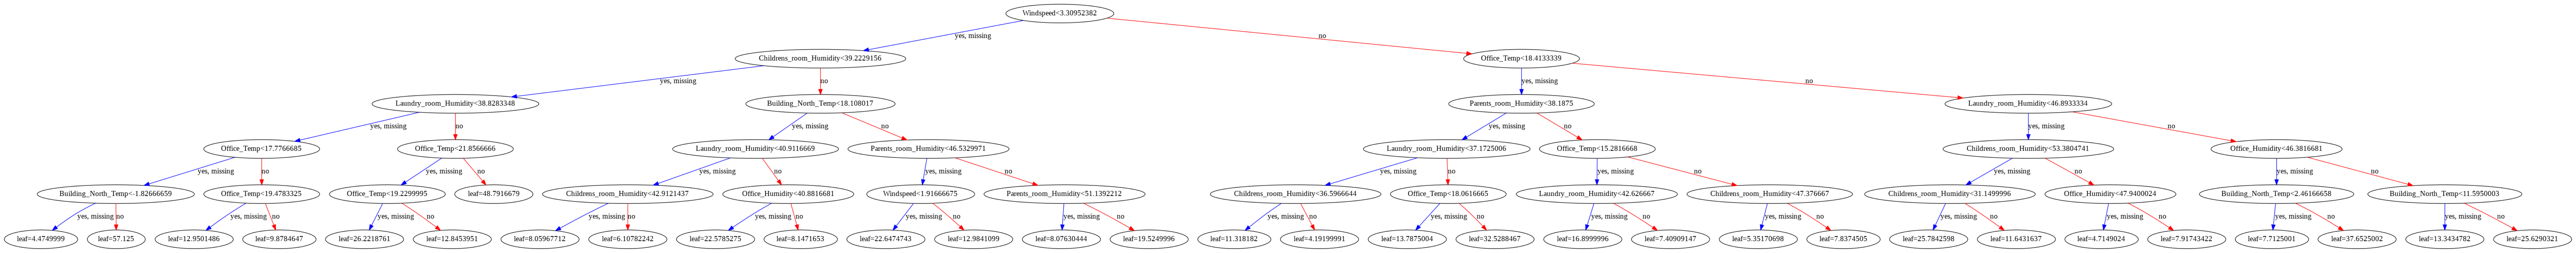

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [150, 1000]
plt.show()

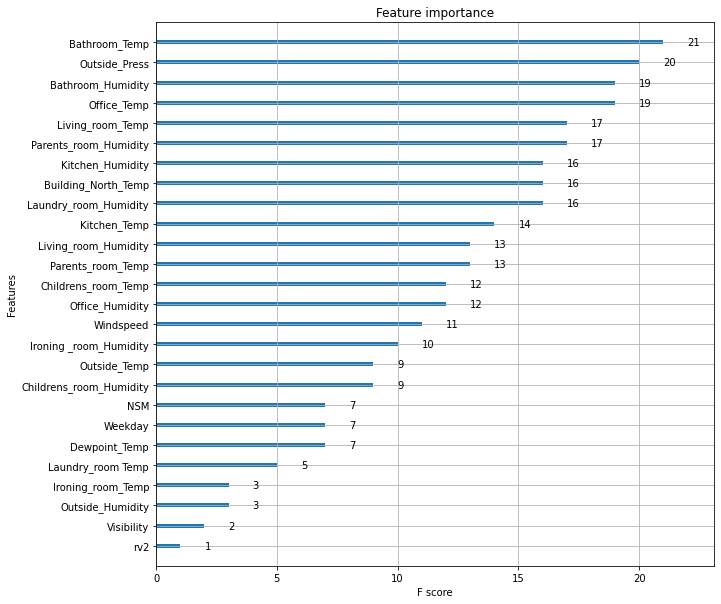

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

#**Hyperparameter tuning**

##**DMatrices**
Instead of numpy arrays or pandas dataFrame, XGBoost uses DMatrices. A DMatrix can contain both the features and the target. If you already have loaded you data into numpy arrays X and y, you can create a DMatrix with:

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

# "Learn" the mean from the training data
mean_train = np.mean(y_train)

##**Baseline Predictions**

In [ ]:
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train[0]
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))


Baseline MAE is 62.54


In [ ]:
np.ones(y_test.shape)*mean_train[0]                                              #`np.ones` create a numpy array of ones as per the shape of array passed in the argument              

array([[101.53395106],
       [101.53395106],
       [101.53395106],
       ...,
       [101.53395106],
       [101.53395106],
       [101.53395106]])

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

In [ ]:
params["eval_metric"] = "mae"
params

{'colsample_bytree': 1,
 'eta': 0.3,
 'eval_metric': 'mae',
 'max_depth': 6,
 'min_child_weight': 1,
 'objective': 'reg:squarederror',
 'subsample': 1}

In [ ]:
num_boost_round = 999

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [ ]:
rmse1 = np.sqrt(mean_squared_error(model.predict(dtest),y_test))
print("RMSE: %f" % (rmse1))

RMSE: 71.671397


As you can see we stopped before reaching the maximum number of boosting rounds, that’s because after the 181th tree, adding more rounds did not lead to improvements of MAE on the test dataset

#**Using XGBoost’s CV**
In order to tune the other hyperparameters, we will use the cv function from XGBoost. It allows us to run cross-validation on our training dataset and returns a mean MAE score.
We need to pass it:
* params: our dictionary of parameters.
* our dtrain matrix.
* num_boost_round: number of boosting rounds. Here we will use a large number again and count on early_stopping_rounds to find the optimal number of rounds before reaching the maximum.
* seed: random seed. It's important to set a seed here, to ensure we are using the same folds for each step so we can properly compare the scores with different parameters.
* nfold: the number of folds to use for cross-validation
* metrics: the metrics to use to evaluate our model, here we use MAE.
As you can see, we don’t need to pass a test dataset here. It’s because the cross-validation function is splitting the train dataset into nfolds and iteratively keeps one of the folds for test purposes.
 
Let’s see what cross-validation score we get with our current parameters:

In [ ]:
cv_results1 = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results1

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,71.361742,0.399343,71.415499,2.209317
1,54.042930,0.320770,54.497572,2.075988
2,46.508972,0.300746,47.398798,1.851465
3,43.418687,0.397306,44.785947,1.591630
4,42.219607,0.539291,44.011417,1.455839
...,...,...,...,...
283,9.735869,0.255224,37.543524,1.360702
284,9.712458,0.263799,37.541223,1.362915
285,9.673284,0.274486,37.534461,1.360550
286,9.632963,0.276836,37.534763,1.352496


cv returns a table where the rows correspond to the number of boosting trees used, here again, we stopped before the 999 rounds (fortunately!).

The 4 columns correspond to the mean and standard deviation of MAE on the test dataset and on the train dataset. For this tutorial we will only try to improve the mean test MAE. We can get the best MAE score from cv with:

In [ ]:
cv_results1['test-mae-mean'].min()

37.5336678

Now that we know how to use cv, we are ready to start tuning! We will first tune our parameters to minimize the MAE on cross-validation, and then check the performance of our model on the test dataset.

##**Parameters** ``max_depth`` and `min_child_weight`

Those parameters add constraints on the architecture of the trees.

`max_depth` is the maximum number of nodes allowed from the root to the farthest leaf of a tree. Deeper trees can model more complex relationships by adding more nodes, but as we go deeper, splits become less relevant and are sometimes only due to noise, causing the model to overfit.

`min_child_weight` is the minimum weight (or number of samples if all samples have a weight of 1) required in order to create a new node in the tree. A smaller `min_child_weight` allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit.

Thus, those parameters can be used to control the complexity of the trees. It is important to tune them together in order to find a good trade-off between model bias and variance

Let’s make a list containing all the combinations `max_depth`/`min_child_weight` that we want to try.

In [ ]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(1,5)
]

Let’s run cross validation on each of those pairs. It can take some time…


In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1],
                                            min_mae))


CV with max_depth=9, min_child_weight=1
	MAE 36.217607 for 193 rounds
CV with max_depth=9, min_child_weight=2
	MAE 36.353763 for 100 rounds
CV with max_depth=9, min_child_weight=3
	MAE 36.546318 for 59 rounds
CV with max_depth=9, min_child_weight=4
	MAE 37.067481199999996 for 78 rounds
CV with max_depth=10, min_child_weight=1
	MAE 35.7721346 for 137 rounds
CV with max_depth=10, min_child_weight=2
	MAE 35.9493698 for 90 rounds
CV with max_depth=10, min_child_weight=3
	MAE 36.3058372 for 31 rounds
CV with max_depth=10, min_child_weight=4
	MAE 36.507779 for 68 rounds
CV with max_depth=11, min_child_weight=1
	MAE 35.2317596 for 108 rounds
CV with max_depth=11, min_child_weight=2
	MAE 35.6590378 for 48 rounds
CV with max_depth=11, min_child_weight=3
	MAE 36.4493552 for 7 rounds
CV with max_depth=11, min_child_weight=4
	MAE 36.6187538 for 8 rounds
Best params: 11, 1, MAE: 35.2317596


We get the best score with a `max_depth` of **11** and `min_child_weight` of **1**, so let's update our params

In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 1

##**Parameters** `subsample` and `colsample_bytree`

Those parameters control the sampling of the dataset that is done at each boosting round.

Instead of using the whole training set every time, we can build a tree on slightly different data at each step, which makes it less likely to overfit to a single sample or feature.

* `subsample` corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.

* `colsample_bytree` corresponds to the fraction of features (the columns) to use. By default it is set to 1 meaning that we will use all features.

Let’s see if we can get better results by tuning those parameters together.

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1],
                                            min_mae))

CV with subsample=1.0, colsample=1.0
	MAE 35.2317596 for 108 rounds
CV with subsample=1.0, colsample=0.9
	MAE 35.186324400000004 for 125 rounds
CV with subsample=1.0, colsample=0.8
	MAE 35.5800936 for 135 rounds
CV with subsample=1.0, colsample=0.7
	MAE 35.7424988 for 7 rounds
CV with subsample=0.9, colsample=1.0
	MAE 35.867899 for 84 rounds
CV with subsample=0.9, colsample=0.9
	MAE 35.945769 for 85 rounds
CV with subsample=0.9, colsample=0.8
	MAE 36.6488432 for 7 rounds
CV with subsample=0.9, colsample=0.7
	MAE 36.3321372 for 7 rounds
CV with subsample=0.8, colsample=1.0
	MAE 36.3246086 for 77 rounds
CV with subsample=0.8, colsample=0.9
	MAE 36.4490822 for 73 rounds
CV with subsample=0.8, colsample=0.8
	MAE 37.0168008 for 7 rounds
CV with subsample=0.8, colsample=0.7
	MAE 36.9071524 for 45 rounds
CV with subsample=0.7, colsample=1.0
	MAE 37.5374556 for 8 rounds
CV with subsample=0.7, colsample=0.9
	MAE 37.3568284 for 39 rounds
CV with subsample=0.7, colsample=0.8
	MAE 37.3779526 for 8

Again, we update our `params` dictionary.


In [ ]:
params['subsample'] = 1.0
params['colsample_bytree'] = 0.9

##**Parameter** `ETA`
The `ETA` parameter controls the learning rate. It corresponds to the shrinkage of the weights associated to features after each round, in other words it defines the amount of "correction" we make at each step.

In practice, having a lower `eta` makes our model more robust to overfitting thus, usually, the lower the learning rate, the best. But with a lower eta, we need more boosting rounds, which takes more time to train, sometimes for only marginal improvements. Let's try a couple of values here, and time them with the notebook command:

In [ ]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results2 = xgb.cv(params,dtrain,seed=42,num_boost_round=num_boost_round,nfold=5,metrics=['mae'],early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results2['test-mae-mean'].min()
    boost_rounds = cv_results2['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs
CV with eta=0.3
CPU times: user 40.2 s, sys: 72.7 ms, total: 40.3 s
Wall time: 40.3 s
	MAE 35.186324400000004 for 125 rounds

CV with eta=0.2
CPU times: user 58.6 s, sys: 132 ms, total: 58.8 s
Wall time: 58.8 s
	MAE 34.4887406 for 189 rounds

CV with eta=0.1
CPU times: user 1min 43s, sys: 207 ms, total: 1min 44s
Wall time: 1min 44s
	MAE 33.295255399999995 for 346 rounds

CV with eta=0.05
CPU times: user 4min 32s, sys: 591 ms, total: 4min 32s
Wall time: 4min 32s
	MAE 33.15940139999999 for 945 rounds

CV with eta=0.01
CPU times: user 1min 49s, sys: 216 ms, total: 1min 50s
Wall time: 1min 50s
	MAE 34.5130884 for 306 rounds

CV with eta=0.005
CPU times: user 3min 32s, sys: 448 ms, total: 3min 32s
Wall time: 3min 32s
	MAE 34.3979402 for 602 rounds

Best params: 0.05, MAE: 33.15940139999999


In [ ]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.003,0.002,0.001]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results2 = xgb.cv(params,dtrain,seed=42,num_boost_round=num_boost_round,nfold=5,metrics=['mae'],early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results2['test-mae-mean'].min()
    boost_rounds = cv_results2['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
CV with eta=0.003
CPU times: user 5min 50s, sys: 843 ms, total: 5min 50s
Wall time: 5min 52s
	MAE 34.3828462 for 994 rounds

CV with eta=0.002
CPU times: user 5min 51s, sys: 756 ms, total: 5min 51s
Wall time: 5min 52s
	MAE 35.342949600000004 for 998 rounds

CV with eta=0.001
CPU times: user 5min 52s, sys: 743 ms, total: 5min 53s
Wall time: 5min 54s
	MAE 44.972279400000005 for 998 rounds

Best params: 0.003, MAE: 34.3828462


As you can see with the , by reducing eta from .005 to .003 we saved only ~.01 in MAE but went from 2 min 56s to 4 min 44s. It looks like we start converging and our MAE is not getting much better,rather its increasing. 

In [ ]:
params['eta'] = .003

#**Results**
Here is how our final dictionary of parameters looks like:


In [ ]:
params
{'colsample_bytree': 0.9,
 'eta': 0.003,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 1,
 'objective': 'reg:squarederror',
 'subsample': 1.0}

{'colsample_bytree': 0.9,
 'eta': 0.003,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 1,
 'objective': 'reg:squarederror',
 'subsample': 1.0}

Let’s train a model with it and see how well it does on our test set!

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1999,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [ ]:
print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best MAE: 32.78 in 1093 rounds


#**Saving your model**
Although we found the best number of rounds, our model has been trained with more rounds than optimal, thus before using it for predictions, we should retrain it with the good number of rounds. Since we now the exact best `num_boost_round`, we don't need the `early_stopping_round` anymore.

In [ ]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

All good, now let’s use our model to make predictions. We will use the test dataset and compute MAE with the scikit-learn function. We should obtain the same score as promised in the last round of training, let’s check!


In [ ]:
mean_absolute_error(best_model.predict(dtest), y_test)

32.778411041862796

In [ ]:
rmse2 = np.sqrt(mean_squared_error(best_model.predict(dtest),y_test))
print("RMSE of model from XgBoost's crossvalidated optimized parameters: %f" % (rmse2))

RMSE of model from XgBoost's crossvalidated optimized parameters: 69.190002


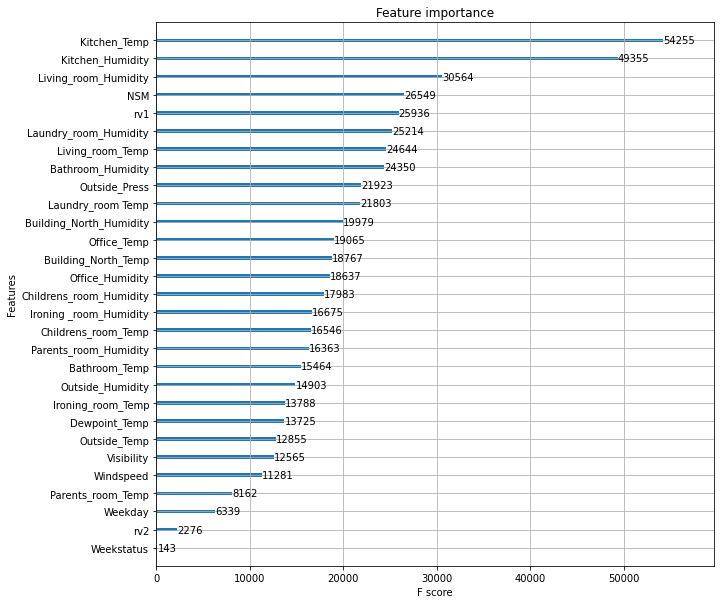

In [ ]:
xgb.plot_importance(best_model)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

#**GridSearch**

In [ ]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
              
xgb_grid = GridSearchCV(xg_reg,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True,
                        error_score=mean_squared_error)
xgb_grid

GridSearchCV(cv=2, error_score=<function mean_squared_error at 0x7f6e58b74ea0>,
             estimator=<xgboost.core.Booster object at 0x7f6e4f590c50>,
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [ ]:
xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting our model with best parameters from grid search.

In [10]:
xg_reg_gcv = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7,
                          learning_rate = 0.05, max_depth = 7, alpha = 10,
                          n_estimators = 500, nthread = 4, min_child_weight= 4,
                          silent= 1, subsample= 0.7)

In [36]:
xg_reg_gcv.fit(X_train,y_train)


yhat = pd.DataFrame(xg_reg_gcv.predict(X_test),columns=["Predicted Values"])
print('Predicted_Values based on optimized parameters from Gridsearch')
y_test.reset_index(drop=True,inplace=True)

yhat.join(y_test)

Predicted_Values based on optimized parameters from Gridsearch


,Predicted Values,Total_Energy_Consumption
0,47.624851,40
1,135.748398,100
2,56.026199,50
3,49.535545,50
4,54.679729,70
...,...,...
5916,258.378632,250
5917,59.225266,60
5918,77.731934,50
5919,107.201286,140


Text(0, 0.5, 'Total Energy consumption')

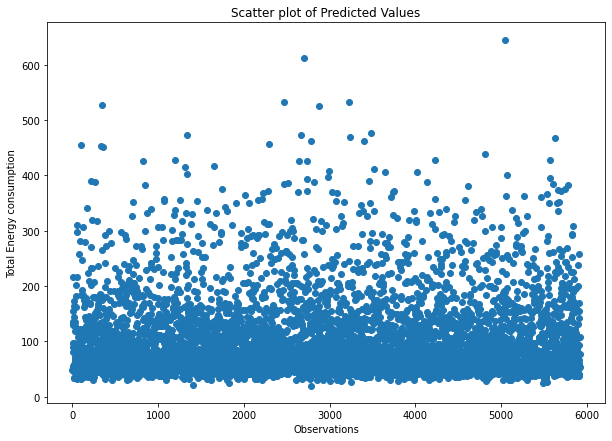

In [51]:
plt.figure(figsize=(10,7))
plt.scatter(yhat.index,yhat,label= "Predicted") 
plt.title("Scatter plot of Predicted Values")
plt.xlabel("Observations")
plt.ylabel("Total Energy consumption")

Text(0, 0.5, 'Total Energy consumption')

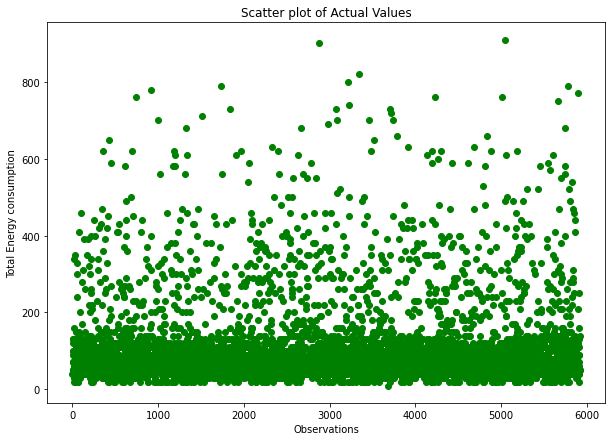

In [52]:
plt.figure(figsize=(10,7))
plt.scatter(y_test.index,y_test,color='green',label= "Predicted") 
plt.title("Scatter plot of Actual Values")
plt.xlabel("Observations")
plt.ylabel("Total Energy consumption")

In [ ]:
rmse_2 = np.sqrt(mean_squared_error(yhat,y_test))
print("RMSE of model from gridsearch optimized parameters: {}".format(rmse_2))

RMSE of model from gridsearch optimized parameters: 69.11711128088035


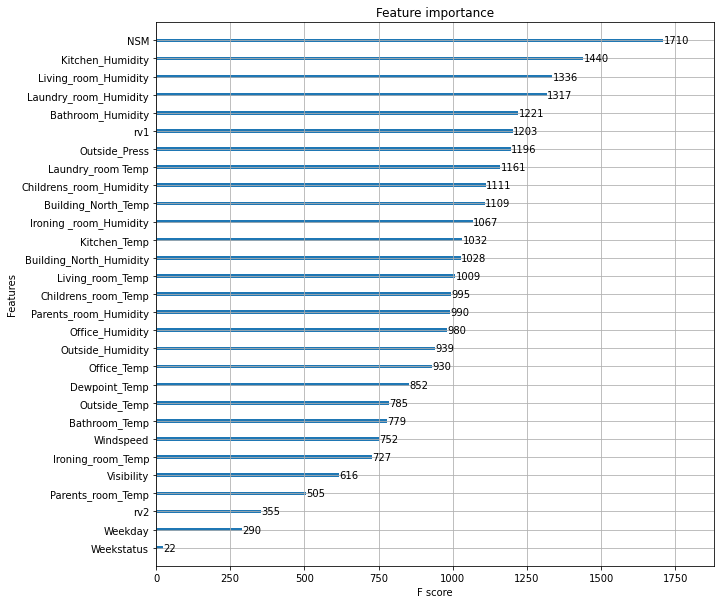

In [ ]:
xgb.plot_importance(xg_reg_gcv)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

#**Conclusion**
From the analysis it is seen that we our best model from ***Gridsearch*** parameters gave us the RMSE of 69.11 which marginally better then the parameters obtained from ***XgBoost's CV*** whose RMSE is ***69.19***. Moreover it is definitely better from the contemporary model without the optimized parameters with RMSE of ***101.57***.